In [39]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from petitRADTRANS.retrieval import plot_style as ps
from astropy.io import fits
from glob import glob
from spectres import spectres
import scicomap as sc

In [48]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/b_free/"

retrievals = ["HR8799b_23_v01_free_all_correctos_clear_0nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_1nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_2nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_3nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_4nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_5nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_6nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_7nodes_v2"]

r2 = ["HR8799b_23_v01_free_all_correctos_freeMgcloud_0nodes_v5",
      "HR8799b_23_v01_free_all_correctos_freeMgcloud_1nodes_v5",
      "HR8799b_23_v01_free_all_correctos_freeMgcloud_2nodes_v4"]

r3 = ["HR8799b_23_v01_free_all_correctos_eqMgCloud_0nodes_v6",
      "HR8799b_23_v01_free_all_correctos_eqMgCloud_1nodes_v6",
      "HR8799b_23_v01_free_all_correctos_eqMgCloud_2nodes_v6",
      "HR8799b_23_v01_free_all_correctos_eqMgCloud_3nodes_v6",
      "HR8799b_23_v01_free_all_correctos_eqMgCloud_4nodes_v6",
      "HR8799b_23_v01_free_all_correctos_eqMgCloud_5nodes_v6",
      "HR8799b_23_v01_free_all_correctos_eqMgCloud_6nodes_v6"]

In [49]:
pres = []
temps = []

for ret in retrievals:
    pres.append(np.load(f"{data_dir}evaluate_{ret}/{ret}_pressures.npy"))
    temps.append(np.load(f"{data_dir}evaluate_{ret}/{ret}_temps.npy"))

pres2 = []
temps2 = []

for r in r2:
    pres2.append(np.load(f"{data_dir}evaluate_{r}/{r}_pressures.npy"))
    temps2.append(np.load(f"{data_dir}evaluate_{r}/{r}_temps.npy"))

pres3 = []
temps3 = []
for r in r3:
    pres3.append(np.load(f"{data_dir}evaluate_{r}/{r}_pressures.npy"))
    temps3.append(np.load(f"{data_dir}evaluate_{r}/{r}_temps.npy"))

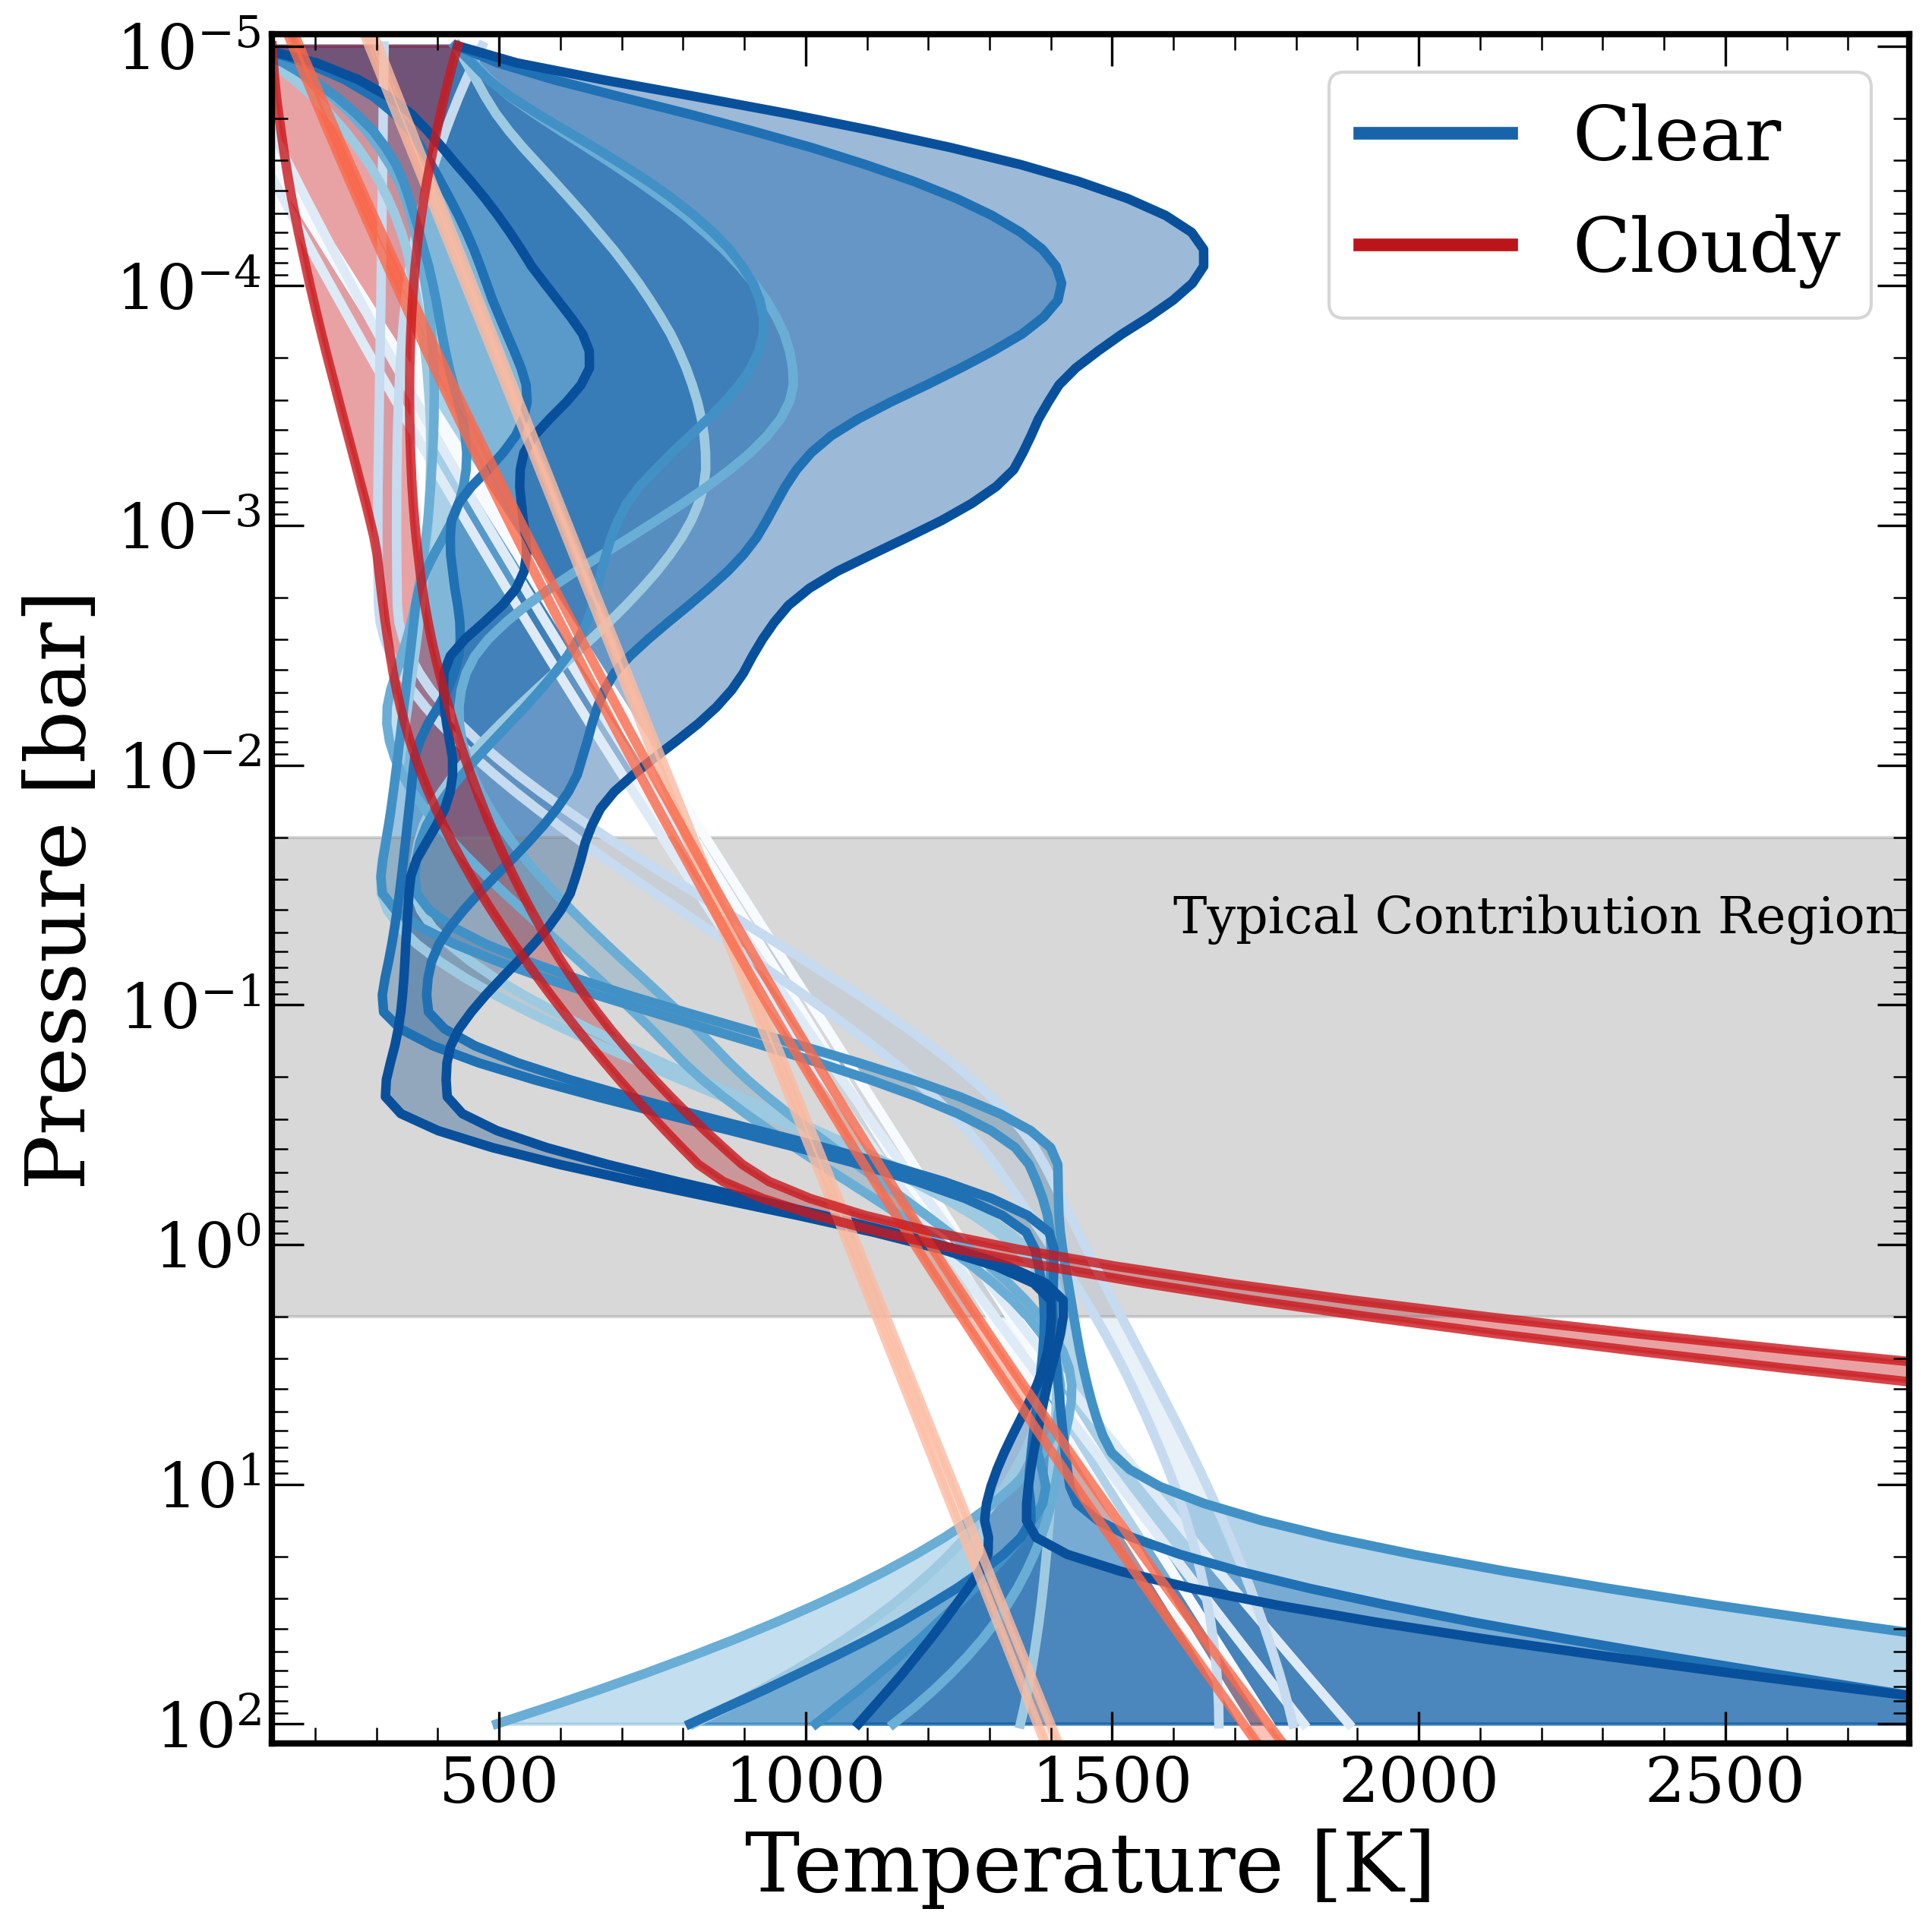

In [50]:
qual_map = sc.ScicoSequential(cmap='Blues')
cs = qual_map.get_mpl_color_map()


fig, ax = plt.subplots(figsize = (9,9))
for i,p in enumerate(pres):
    #print(p.shape,temps[i].shape, temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :].shape)
    #print(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :])
    """ax.fill_betweenx(p,
                x1 = temps[i][int(temps[i].shape[0]*(0.5-0.997/2.)), :],
                x2 = temps[i][int(temps[i].shape[0]*(0.5+0.997/2.)), :],
                color = cs[i],
                alpha = 0.4,
                zorder = 0)"""
    ax.fill_betweenx(p,
                    x1 = temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :],
                    x2 = temps[i][int(temps[i].shape[0]*(0.5+0.68/2.)), :],
                    color = cs(i/8), 
                    #label = labs[i],
                    alpha = 0.4,
                    zorder = 0)
    ax.plot(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :], 
            p,
            color = cs(i/8), 
            alpha = 1,
            linewidth = 3)
    ax.plot(temps[i][int(temps[i].shape[0]*(0.5+0.68/2.)), :],
            p,
            color = cs(i/8), 
            alpha = 1,
            linewidth = 3)

qual_map2 = sc.ScicoSequential(cmap='Reds')
cs2 = qual_map2.get_mpl_color_map()

for i,p in enumerate(pres2):
    #print(p.shape,temps[i].shape, temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :].shape)
    #print(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :])
    ax.fill_betweenx(p,
                    x1 = temps2[i][int(temps2[i].shape[0]*(0.5-0.68/2.)), :],
                    x2 = temps2[i][int(temps2[i].shape[0]*(0.5+0.68/2.)), :],
                    color = cs2((i+1)/4), 
                    #label = labs[i],
                    alpha = 0.4,
                    zorder = 0)
    ax.plot(temps2[i][int(temps2[i].shape[0]*(0.5-0.68/2.)), :], 
            p,
            color = cs2((i+1)/4), 
            alpha = 0.8,
            linewidth = 3)
    ax.plot(temps2[i][int(temps2[i].shape[0]*(0.5+0.68/2.)), :],
            p,
            color = cs2((i+1)/4), 
            alpha = 0.8,
            linewidth = 3)

ax.fill_between(np.linspace(100,12000),2e-2,2e0, color = 'gray', alpha = 0.3)

ax.set_axisbelow(False)
ax.tick_params(zorder =10)
ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_xlim(130,2800)
ax.set_ylim(1.205e2,8.95e-6)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=cs(0.8), lw=4, alpha = 1),
                Line2D([0], [0], color=cs2(0.8), lw=4, alpha = 1)]

ax.legend(custom_lines, ['Clear','Cloudy'],loc = 'upper right')

ax.annotate("Typical Contribution Region", (1600,5e-2),fontsize = 16)
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Pressure [bar]')
plt.savefig("plots/HR8799_PT_Profiles_v2.pdf",bbox_inches='tight')

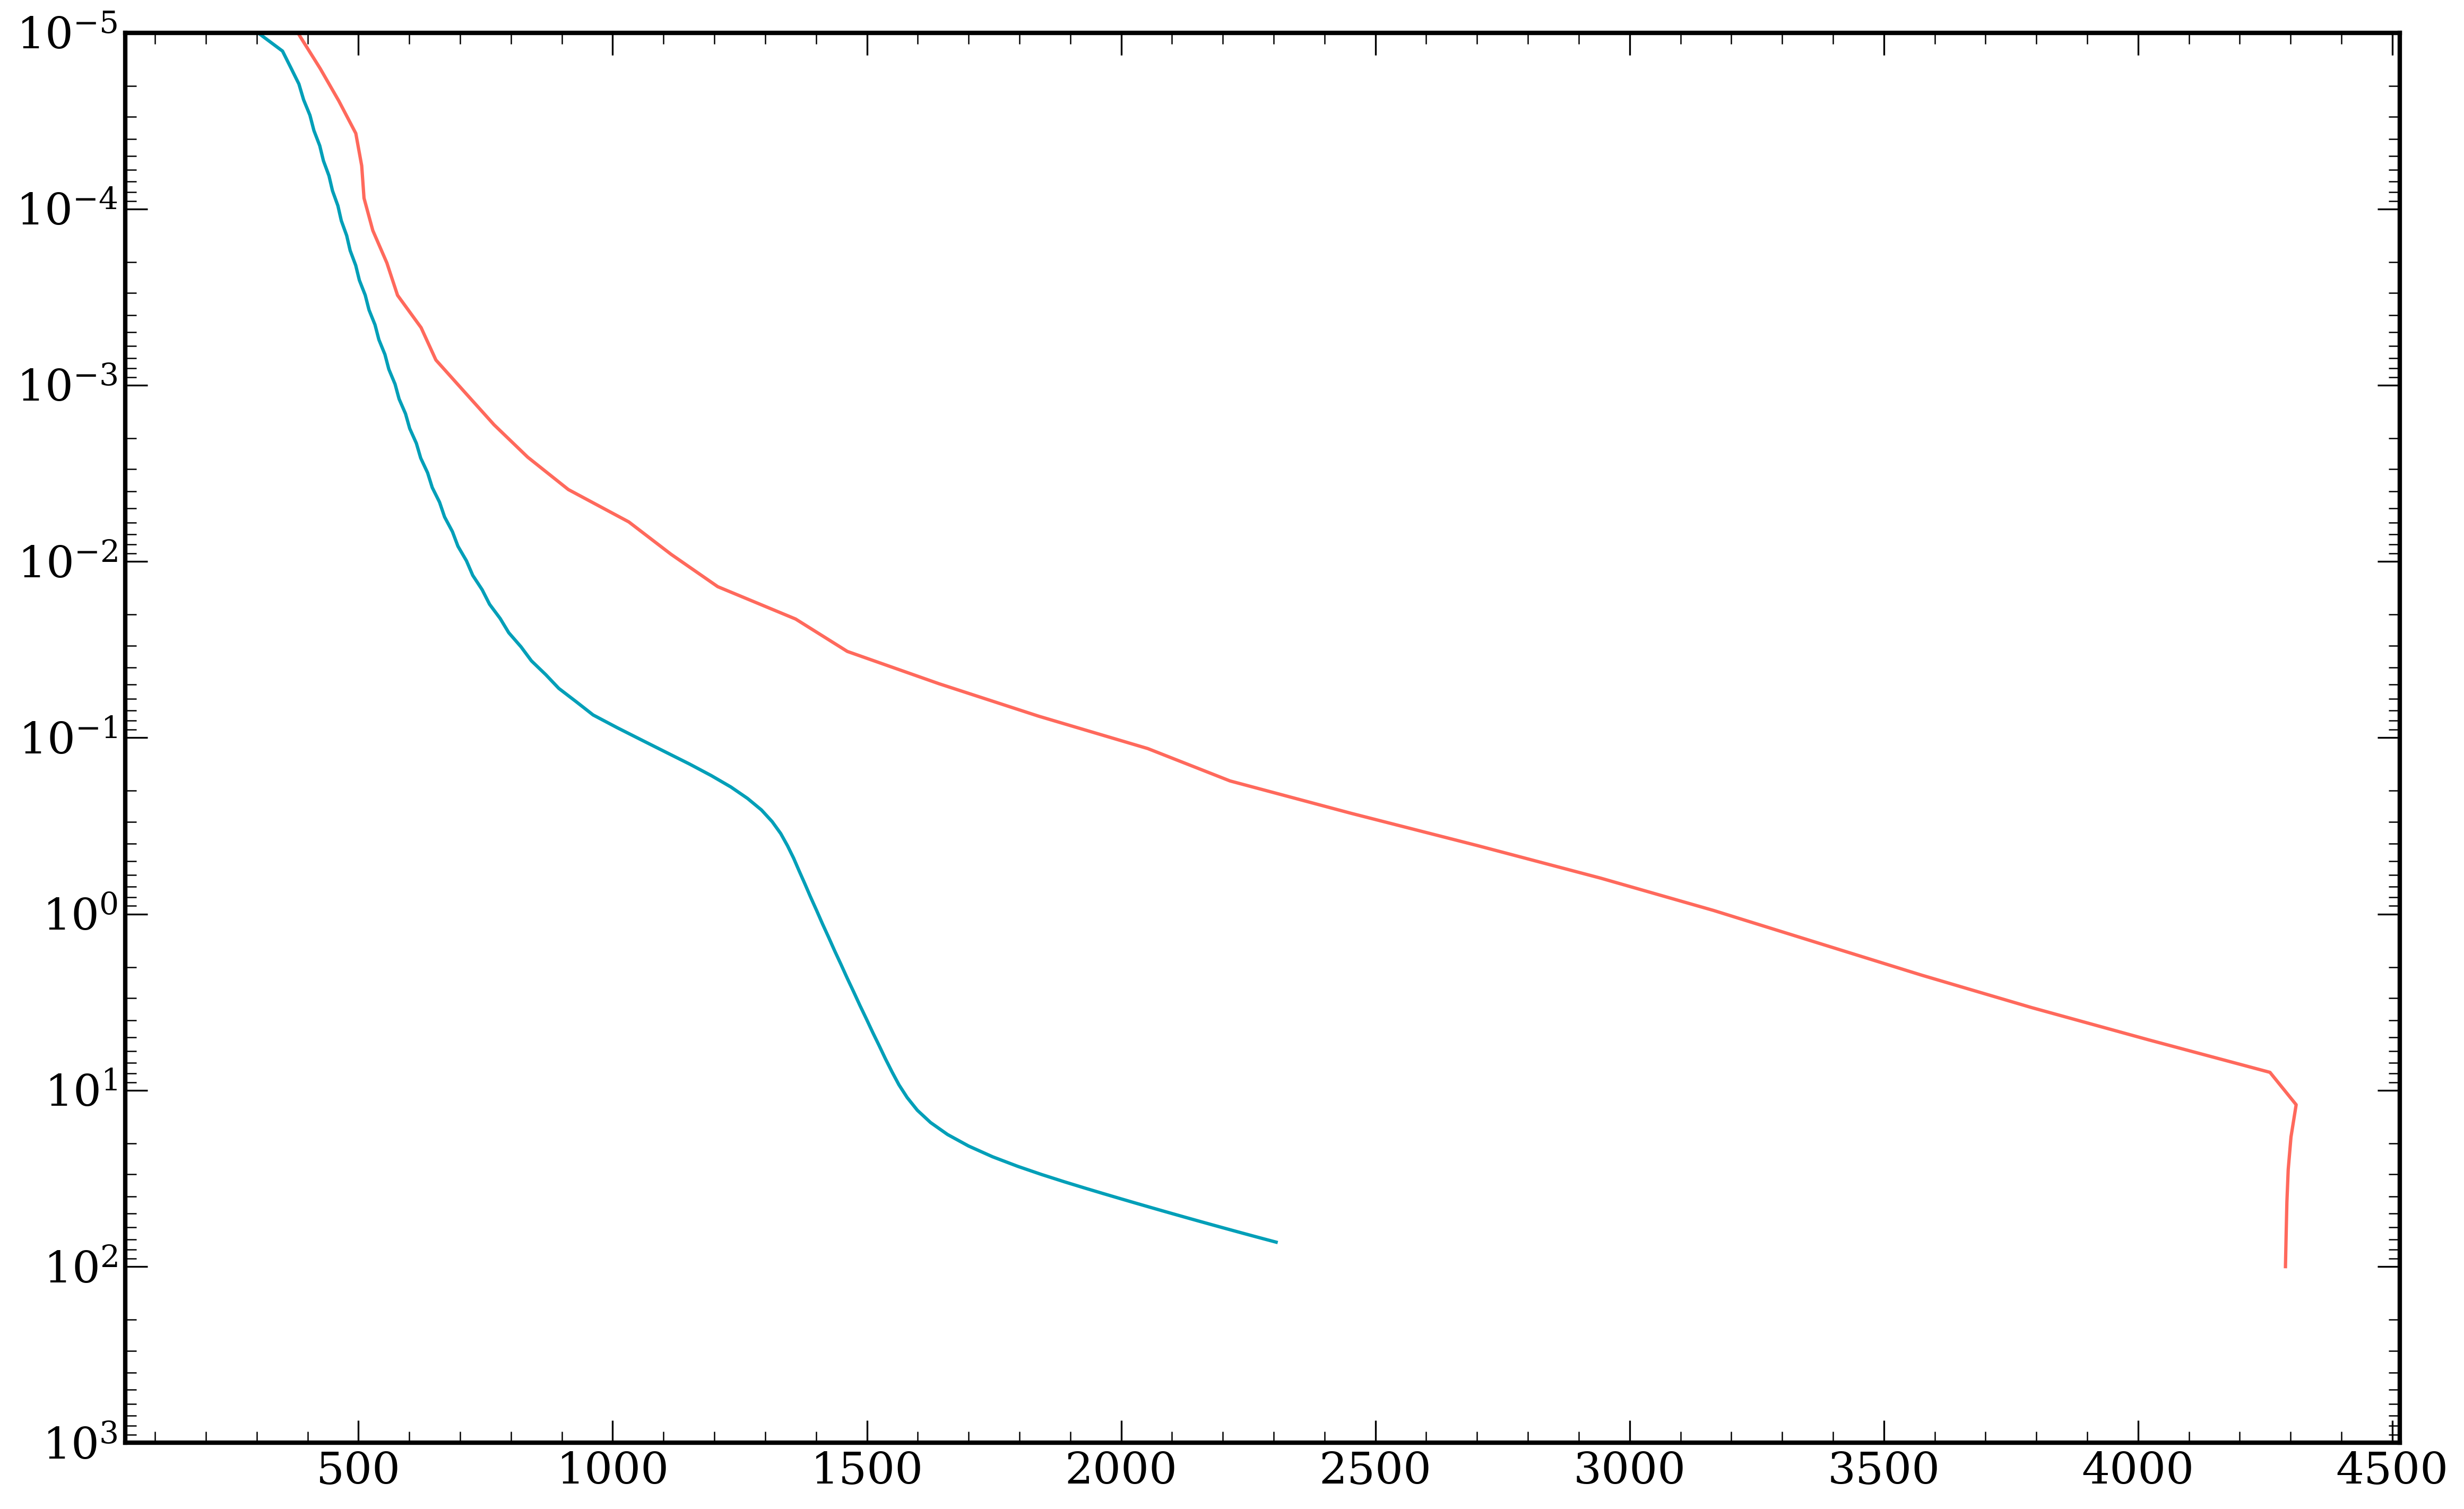

In [42]:
#Load in self-consistent models
planets = ["e"]
models = ["ATMO", "ExoRem"]

model_dirs = {}
model_dirs["ATMO"] = "/Users/nasedkin/data/petrus2022/"
model_dirs["ExoRem"] = "/Users/nasedkin/data/cloud_R500/"

atmo_b1 = np.genfromtxt(model_dirs["ATMO"] +"co0.3_m0.6/pt_t1100_g5.0_m0.6_kg_co0.3_g1.05.dat").T
atmo_b=np.genfromtxt(model_dirs["ATMO"] +"co0.3_m0.6/pt_t1100_g5.0_m0.6_kg_co0.3_g1.01.dat").T
exorem_b=np.genfromtxt(model_dirs["ExoRem"] +"temperature_profile_YGP_950K_logg5.0_met10.00_CO0.55.dat").T

atmo_e=np.genfromtxt(model_dirs["ATMO"] +"grid_p0.6/pt_t1200_g4.0_p0.6_kg_g1.05.dat").T
exorem_e=np.genfromtxt(model_dirs["ExoRem"] +"temperature_profile_YGP_1100K_logg3.5_met10.00_CO0.80.dat").T


#selfconsistent = {}
#for planet in planets:
#    selfconsistent[planet] = {}
fig, ax = plt.subplots()
#ax.plot(atmo_b1[1],atmo_b1[0])
ax.plot(atmo_e[1],atmo_e[0])

ax.plot(exorem_e[1],exorem_e[0]*1e-6)
ax.set_ylim(1e3,1e-5)
ax.set_yscale('log')

In [44]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/b_free/"

retrievals = ["HR8799b_23_v01_free_all_correctos_clear_0nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_1nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_2nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_3nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_4nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_5nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_6nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_7nodes_v2"]

r2 = ["HR8799b_23_v01_free_all_correctos_freeMgcloud_0nodes_v4",
      "HR8799b_23_v01_free_all_correctos_freeMgcloud_1nodes_v4",
      "HR8799b_23_v01_free_all_correctos_freeMgcloud_2nodes_v4",
      "HR8799b_23_v01_free_all_correctos_freeMgcloud_3nodes_v5"]

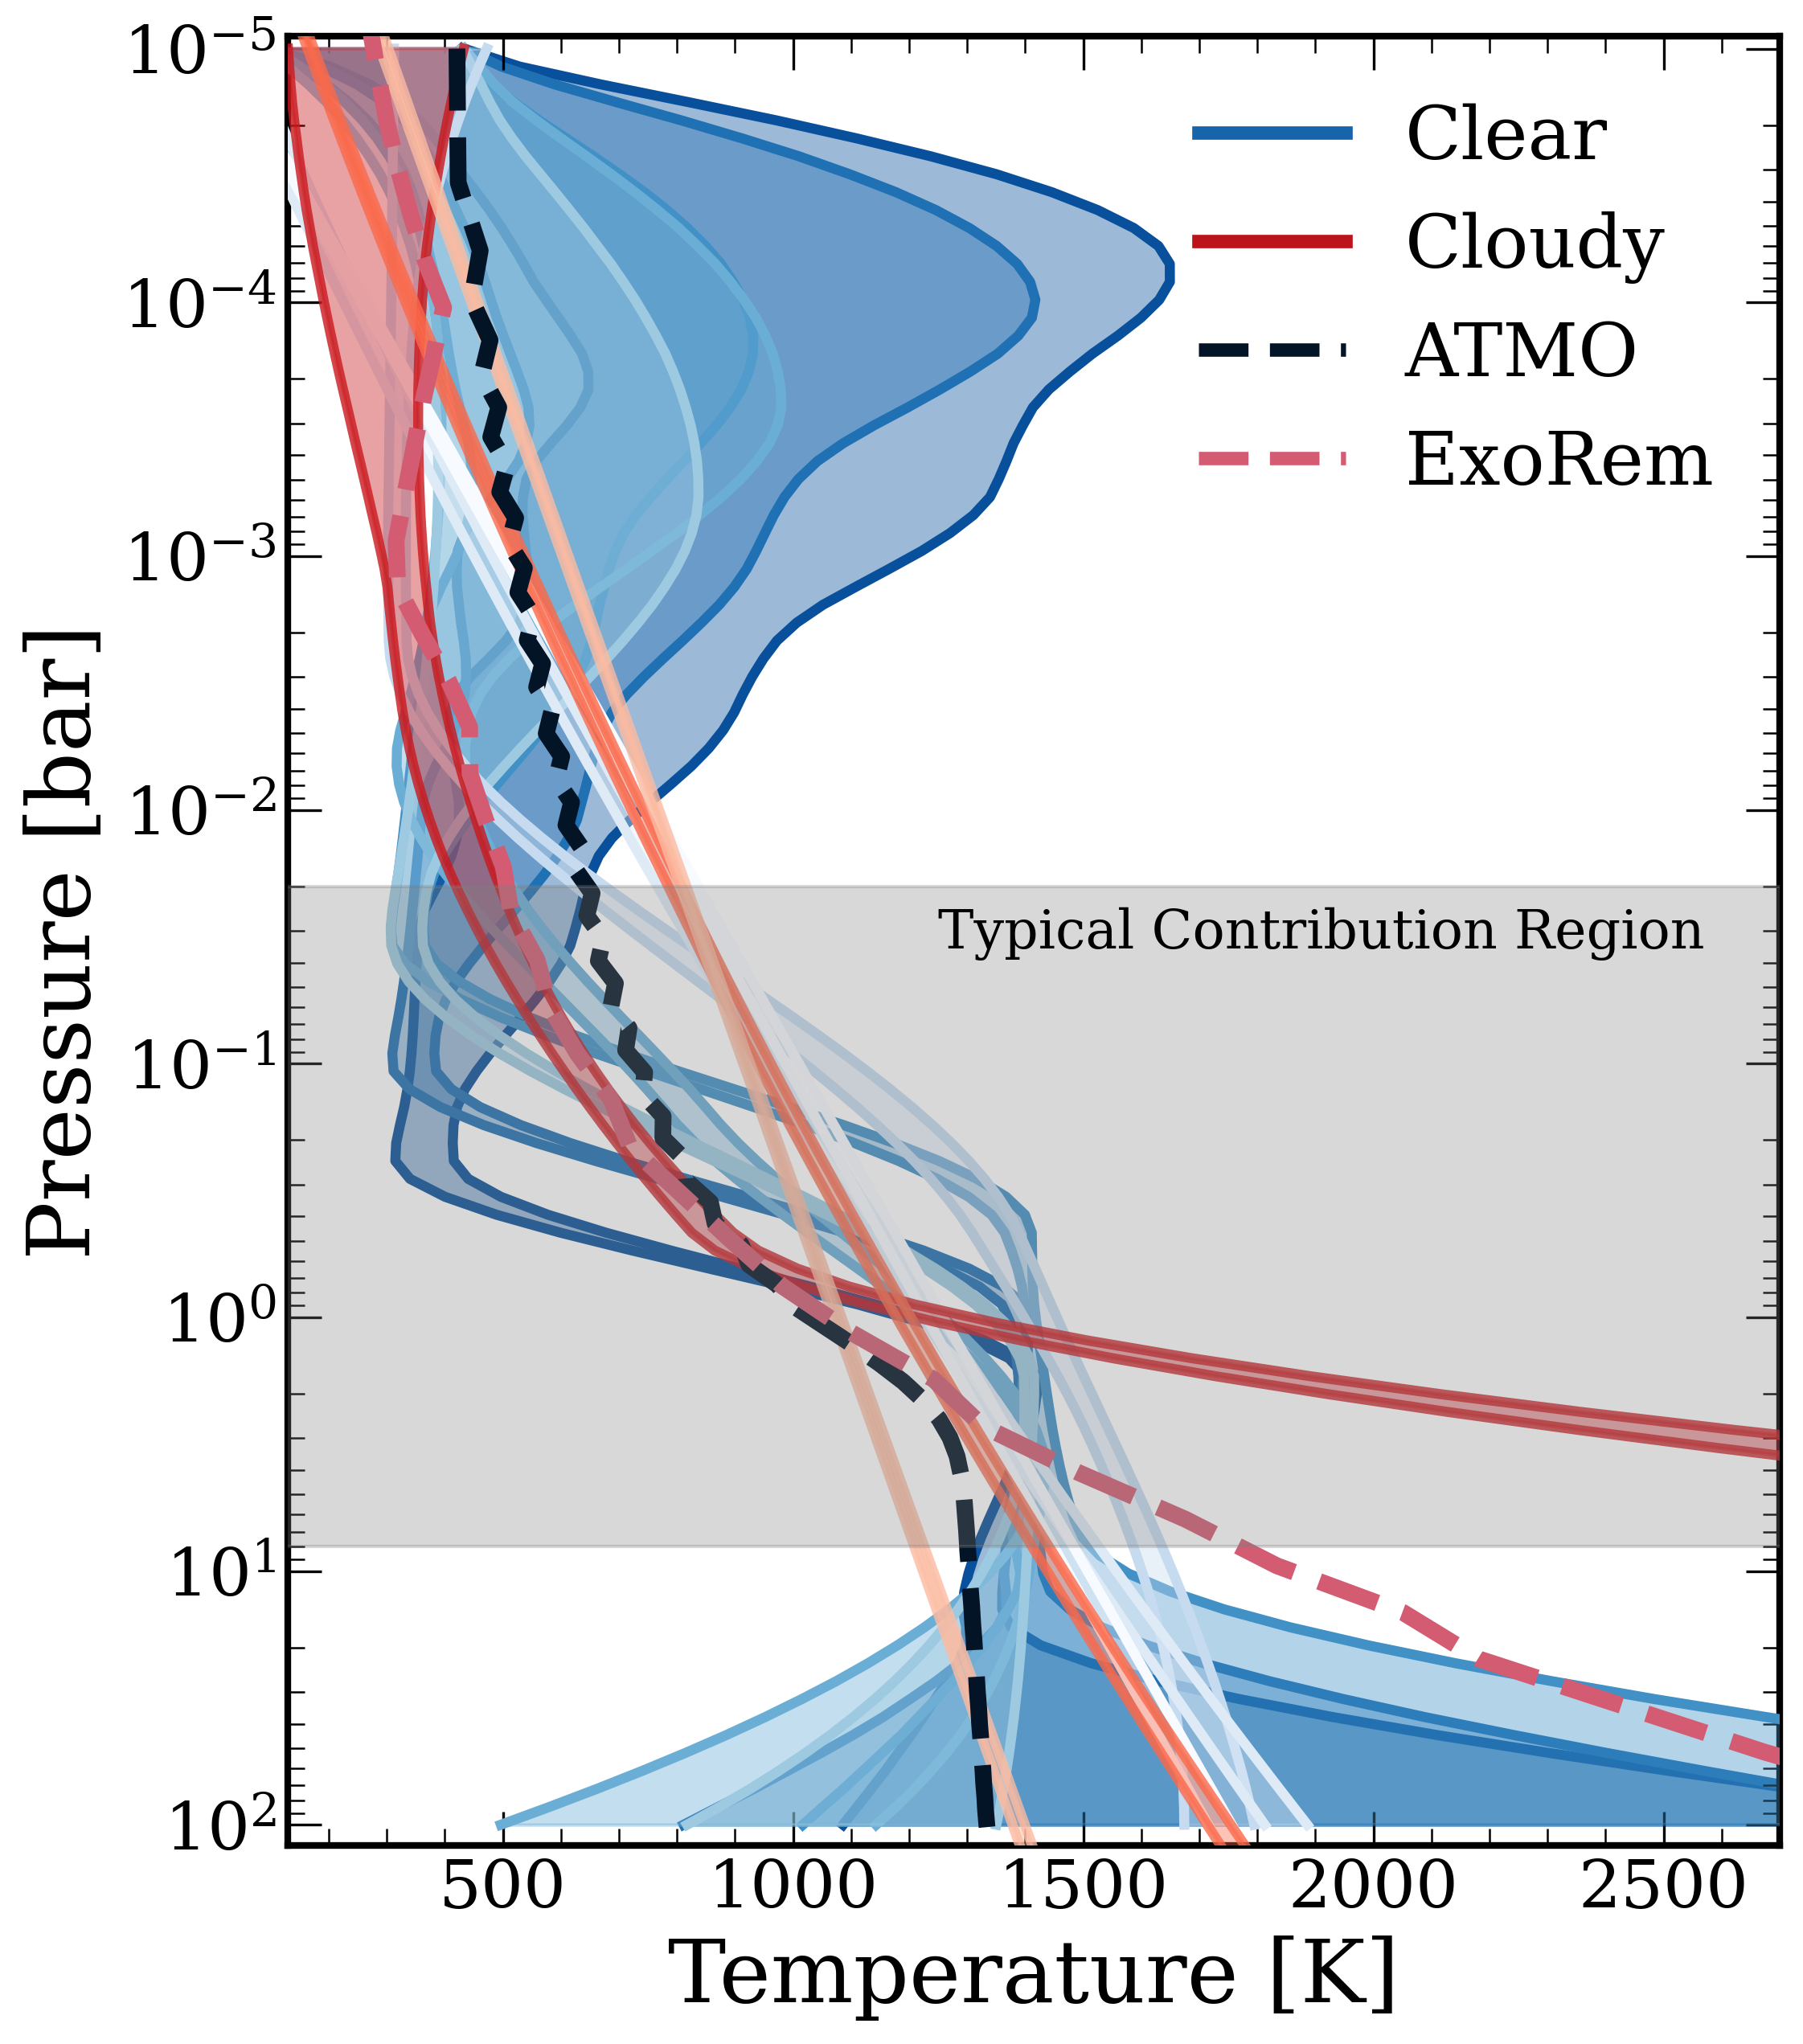

In [57]:
qual_map = sc.ScicoSequential(cmap='Blues')
cs = qual_map.get_mpl_color_map()


fig, ax = plt.subplots(figsize = (8,9))

qual_map = sc.ScicoSequential(cmap='heat')
grid_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":grid_cmap(6/10),
                     "diamondback":grid_cmap(3/10),
                     "petrus2023":grid_cmap(1/10),
                     "petitcode-hot-cloudy":grid_cmap(9/10),
                     "petitcode-cool-cloudy":grid_cmap(9/10)}

for i,p in enumerate(pres):
    #print(p.shape,temps[i].shape, temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :].shape)
    #print(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :])
    """ax.fill_betweenx(p,
                x1 = temps[i][int(temps[i].shape[0]*(0.5-0.997/2.)), :],
                x2 = temps[i][int(temps[i].shape[0]*(0.5+0.997/2.)), :],
                color = cs[i],
                alpha = 0.4,
                zorder = 0)"""
    ax.fill_betweenx(p,
                    x1 = temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :],
                    x2 = temps[i][int(temps[i].shape[0]*(0.5+0.68/2.)), :],
                    color = cs(i/8), 
                    #label = labs[i],
                    alpha = 0.4,
                    zorder = len(pres)-i)
    ax.plot(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :], 
            p,
            color = cs(i/8), 
            alpha = 1,
            linewidth = 3,
            zorder = len(pres)-i)
    ax.plot(temps[i][int(temps[i].shape[0]*(0.5+0.68/2.)), :],
            p,
            color = cs(i/8), 
            alpha = 1,
            linewidth = 3,
            zorder = len(pres)-i)

qual_map2 = sc.ScicoSequential(cmap='Reds')
cs2 = qual_map2.get_mpl_color_map()

for i,p in enumerate(pres2):
    #print(p.shape,temps[i].shape, temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :].shape)
    #print(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :])
    ax.fill_betweenx(p,
                    x1 = temps2[i][int(temps2[i].shape[0]*(0.5-0.68/2.)), :],
                    x2 = temps2[i][int(temps2[i].shape[0]*(0.5+0.68/2.)), :],
                    color = cs2((i+1)/4), 
                    #label = labs[i],
                    alpha = 0.4,
                    zorder = len(pres)+len(pres2)-i)
    ax.plot(temps2[i][int(temps2[i].shape[0]*(0.5-0.68/2.)), :], 
            p,
            color = cs2((i+1)/4), 
            alpha = 0.8,
            linewidth = 3,
            zorder = len(pres)+len(pres2)-i)
    ax.plot(temps2[i][int(temps2[i].shape[0]*(0.5+0.68/2.)), :],
            p,
            color = cs2((i+1)/4), 
            alpha = 0.8,
            linewidth = 3,
            zorder = len(pres)+len(pres2)-i)
ax.plot(atmo_b[1],
        atmo_b[0], 
        linewidth = 5,
        label = "ATMO", 
        color = model_colour_dict['petrus2023'], 
        linestyle = '--',
        zorder = 15)
ax.plot(exorem_b[1],
        exorem_b[0]*1e-5, 
        color = model_colour_dict['exo-rem'], 
        linewidth = 5, 
        label = "ExoRem", 
        linestyle = '--',
        zorder = 16)

ax.fill_between(np.linspace(100,12000),2e-2,8e0, color = 'gray', alpha = 0.3,zorder = 20)

ax.set_axisbelow(False)
ax.tick_params(zorder =10)
ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_xlim(130,2700)
ax.set_ylim(1.205e2,8.95e-6)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=cs(0.8), lw=4, alpha = 1),
                Line2D([0], [0], color=cs2(0.8), lw=4, alpha = 1),
                Line2D([0], [0], color= model_colour_dict['petrus2023'], lw=4, alpha = 1, linestyle = '--'),
                Line2D([0], [0], color= model_colour_dict['exo-rem'], lw=4, alpha = 1, linestyle = '--')]

ax.legend(custom_lines, ['Clear','Cloudy', "ATMO", "ExoRem"],loc = 'upper right',frameon=False,fontsize=22)
ax.annotate("Typical Contribution Region", (1250,3.5e-2),fontsize = 16,zorder = 21)
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Pressure [bar]')
plt.savefig("plots/HR8799b_splines_v3.pdf",bbox_inches='tight')

In [17]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_full/"

retrievals = ["HR8799e_23_v01_diseq_all_eqFeMgCloud_bothfseds_newphot",
              "HR8799e_23_v01_diseq_all_eqFeMgCloud_grad_newphot",
              "HR8799e_23_v01_diseq_all_eqFeMgCloud_spline_newphot"]

pres = []
temps = []

for ret in retrievals:
    pres.append(np.load(f"{data_dir}evaluate_{ret}/{ret}_pressures.npy"))
    temps.append(np.load(f"{data_dir}evaluate_{ret}/{ret}_temps.npy"))
    
r2 = ["HR8799e_23_v02_free_all_freeFeMgCloud_guillot_newphot_newconv_newSPHGPI",
      "HR8799e_23_v02_free_all_freeFeMgCloud_grad_fseds_newphot_newconv_newSPHGPI",
      "HR8799e_23_v02_free_all_eqFeMgCloud_grad_fseds_newphot_newconv_newSPHGPI",
      "HR8799e_23_v01_free_all_freeFeMgCloud_spline_newphot_newconv"]


pres2 = []
temps2 = []
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_free/"

for r in r2:
    pres2.append(np.load(f"{data_dir}evaluate_{r}/{r}_pressures.npy"))
    temps2.append(np.load(f"{data_dir}evaluate_{r}/{r}_temps.npy"))

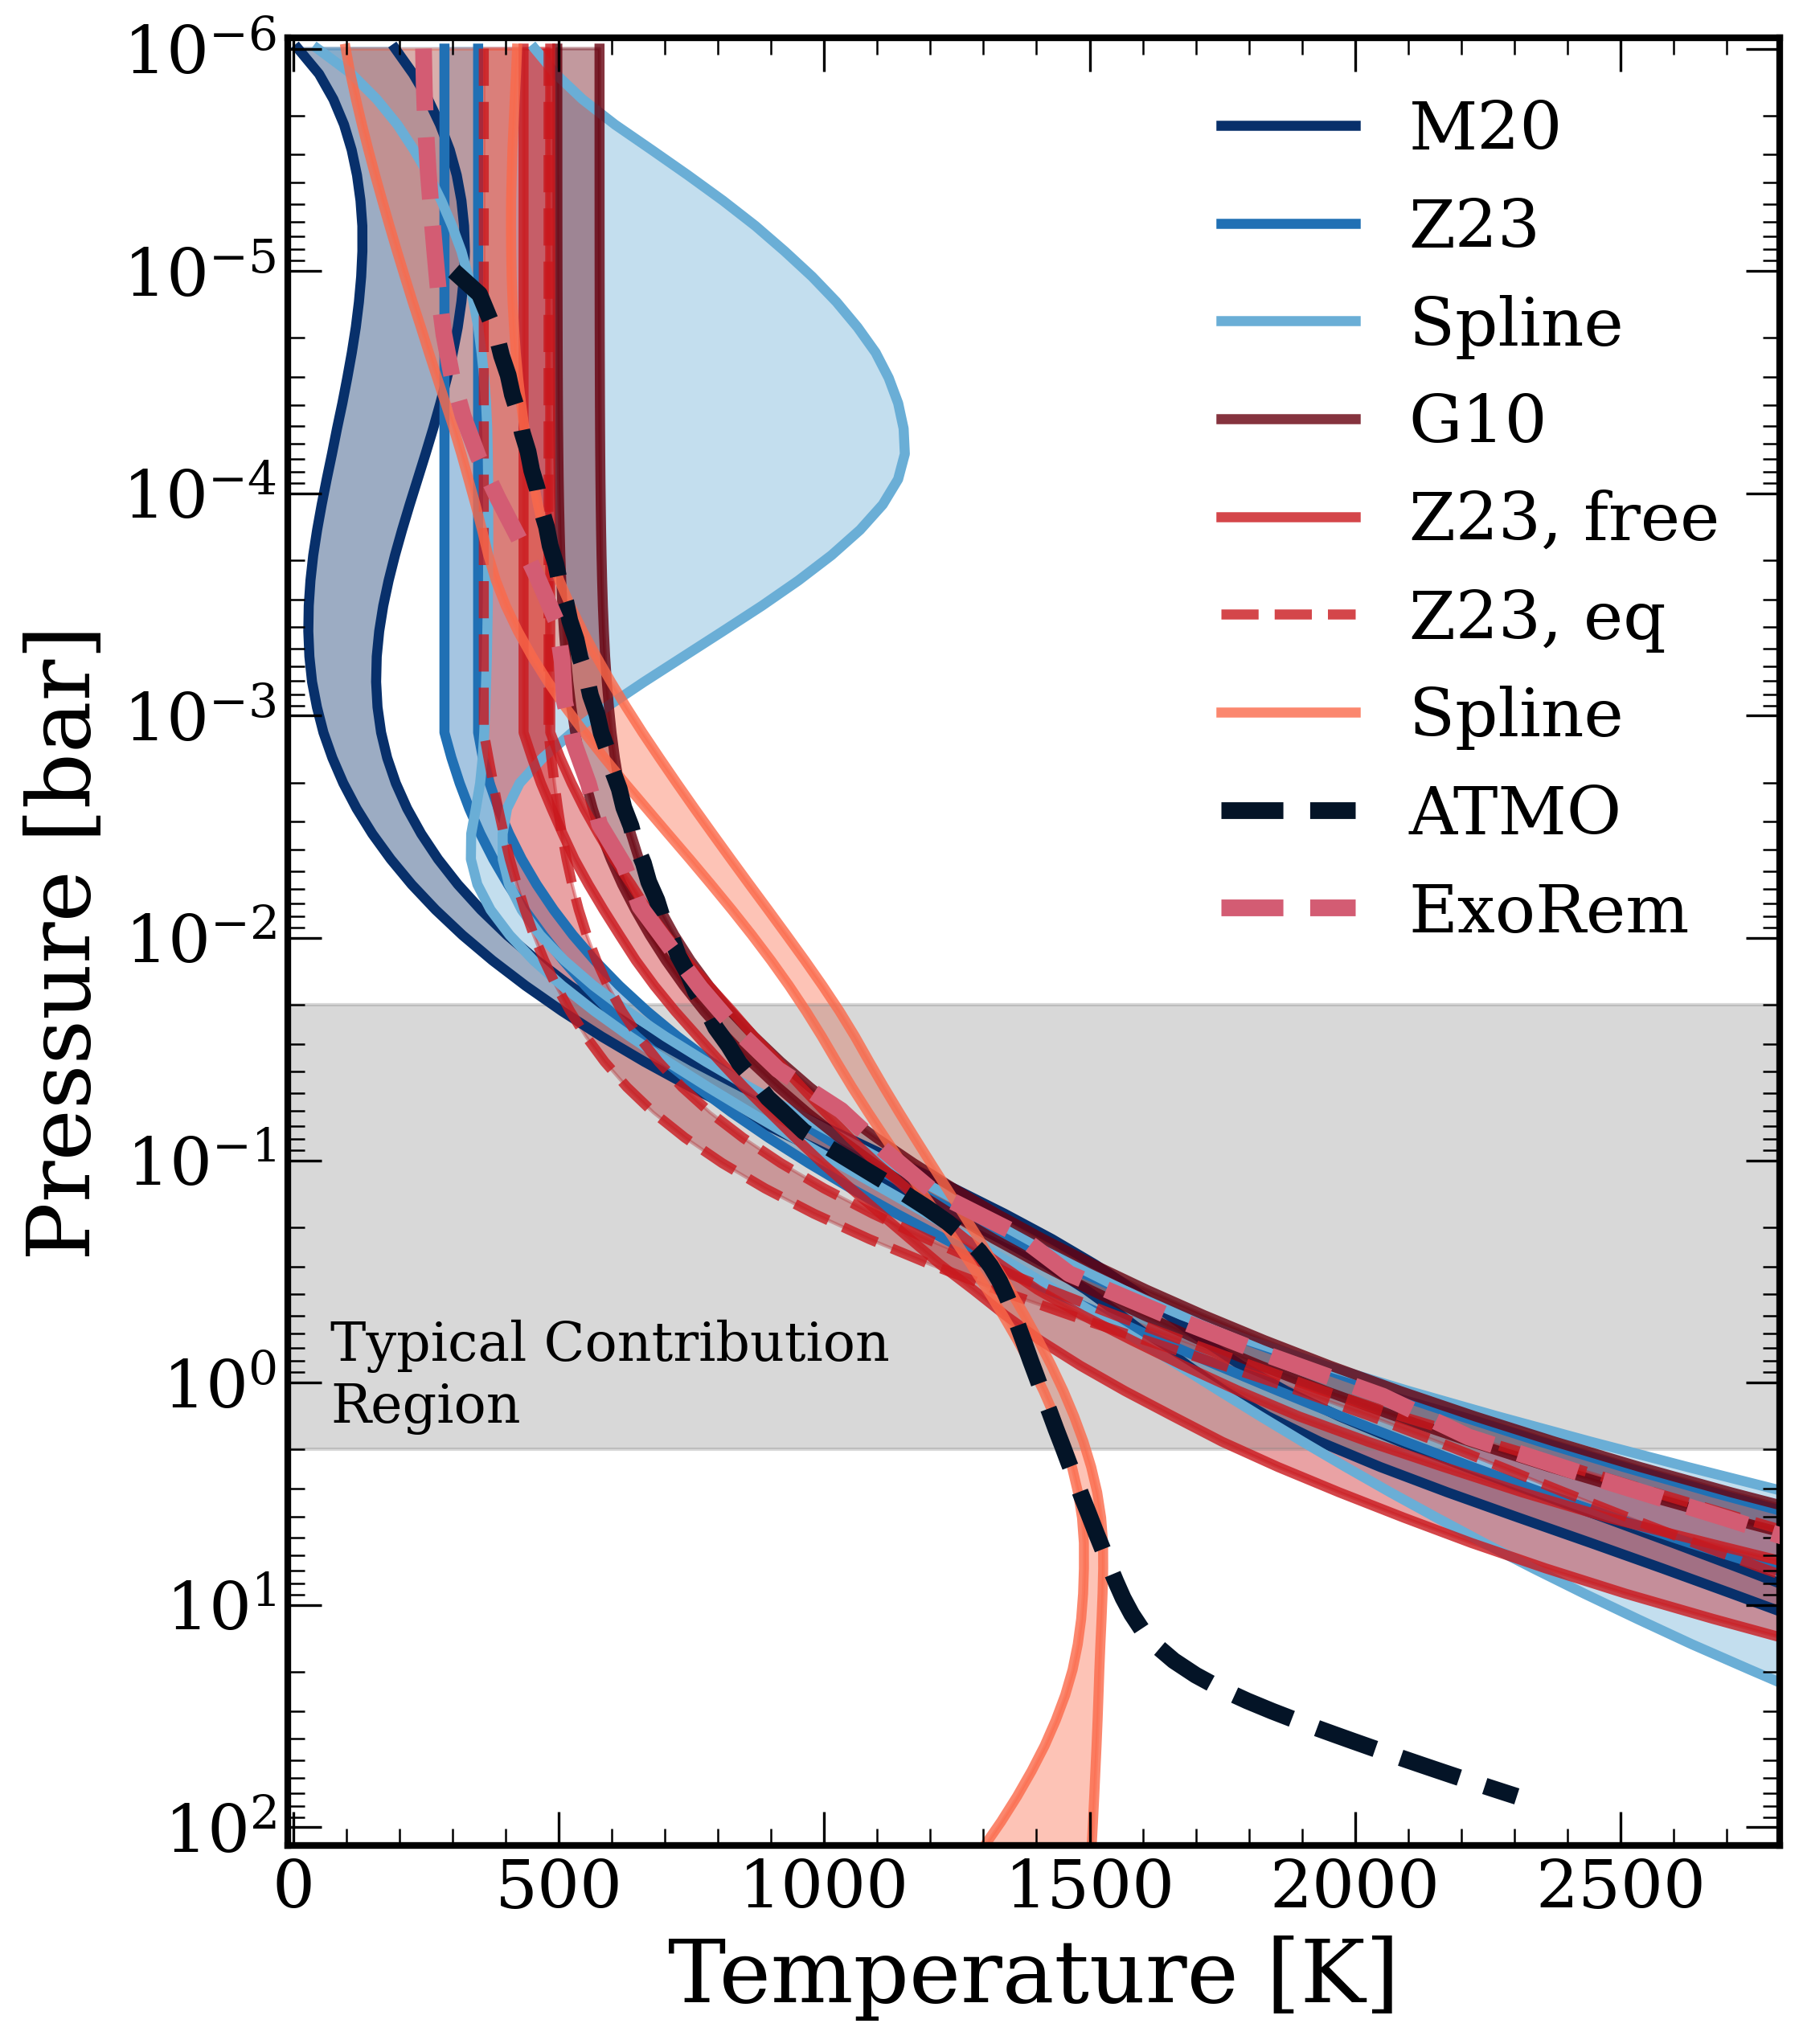

In [38]:
qual_map = sc.ScicoSequential(cmap='Blues')
cs = qual_map.get_mpl_color_map()
labs = ["M20", "Z23", "Spline"]

fig, ax = plt.subplots(figsize = (8,9))
for i,p in enumerate(pres):
    #print(p.shape,temps[i].shape, temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :].shape)
    #print(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :])
    """ax.fill_betweenx(p,
                x1 = temps[i][int(temps[i].shape[0]*(0.5-0.997/2.)), :],
                x2 = temps[i][int(temps[i].shape[0]*(0.5+0.997/2.)), :],
                color = cs[i],
                alpha = 0.4,
                zorder = 0)"""
    ax.fill_betweenx(p,
                    x1 = temps[i][int(temps[i].shape[0]*(0.5-0.9/2.)), :],
                    x2 = temps[i][int(temps[i].shape[0]*(0.5+0.9/2.)), :],
                    color = cs((4-i)/4), 
                    alpha = 0.4,
                    zorder = 0)
    ax.plot(temps[i][int(temps[i].shape[0]*(0.5-0.9/2.)), :], 
            p,
            color = cs((4-i)/4), 
            label = labs[i],
            alpha = 1,
            linewidth = 3)
    ax.plot(temps[i][int(temps[i].shape[0]*(0.5+0.9/2.)), :],
            p,
            color = cs((4-i)/4), 
            alpha = 1,
            linewidth = 3)

qual_map2 = sc.ScicoSequential(cmap='Reds')
cs2 = qual_map2.get_mpl_color_map()
labs = ["G10", "Z23, free", "Z23, eq", "Spline"]

for i,p in enumerate(pres2):
    #print(p.shape,temps[i].shape, temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :].shape)
    #print(temps[i][int(temps[i].shape[0]*(0.5-0.68/2.)), :])
    linestyle = '-'
    count = i
    if i>1:count = i-1
    if labs[i] == "Z23, eq":
        linestyle = '--'

    ax.fill_betweenx(p,
                    x1 = temps2[i][int(temps2[i].shape[0]*(0.5-0.68/2.)), :],
                    x2 = temps2[i][int(temps2[i].shape[0]*(0.5+0.68/2.)), :],
                    color = cs2((4-count)/4), 
                    alpha = 0.4,
                    zorder = 0)
    ax.plot(temps2[i][int(temps2[i].shape[0]*(0.5-0.68/2.)), :], 
            p,
            color = cs2((4-count)/4), 
            linestyle = linestyle,
            label = labs[i],
            alpha = 0.8,
            linewidth = 3)
    ax.plot(temps2[i][int(temps2[i].shape[0]*(0.5+0.68/2.)), :],
            p,
            color = cs2((4-count)/4), 
            linestyle = linestyle,
            alpha = 0.8,
            linewidth = 3)
            
ax.fill_between(np.linspace(-10,12000),2e-2,2e0, color = 'gray', alpha = 0.3)
qual_map = sc.ScicoSequential(cmap='heat')
grid_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":grid_cmap(6/10),
                     "diamondback":grid_cmap(3/10),
                     "petrus2023":grid_cmap(1/10),
                     "petitcode-hot-cloudy":grid_cmap(9/10),
                     "petitcode-cool-cloudy":grid_cmap(9/10)}

ax.plot(atmo_e[1],
        atmo_e[0], 
        linewidth = 5,
        label = "ATMO", 
        color = model_colour_dict['petrus2023'], 
        linestyle = '--',
        zorder = 15)
ax.plot(exorem_e[1],
        exorem_e[0]*1e-5, 
        color = model_colour_dict['exo-rem'], 
        linewidth = 5, 
        label = "ExoRem", 
        linestyle = '--',
        zorder = 16)

ax.set_axisbelow(False)
ax.tick_params(zorder =10)
ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_xlim(-10,2800)
ax.set_ylim(1.205e2,8.95e-7)
from matplotlib.lines import Line2D

import matplotlib
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=10) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=10)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#custom_lines = [Line2D([0], [0], color=cs(0.8), lw=4, alpha = 1),
#                Line2D([0], [0], color=cs2(0.8), lw=4, alpha = 1)]

ax.legend(loc = 'upper right',frameon=False,fontsize = 20)

ax.annotate("Typical Contribution\nRegion", (70,1.5),fontsize = 16)
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Pressure [bar]')
plt.savefig("plots/HR8799e_PT_Profiles_v3.pdf",bbox_inches='tight')